In [ ]:
import matplotlib.pyplot as plt

def plot_over_epochs(y_values: list, title: str, y_label: str, legend: str, y_values_prime: list = None, legend_prime: str = None):
    plt.figure(figsize=(4, 4))
    plt.plot(list(range(len(y_values))), y_values, label=legend)
    plt.title(title)
    plt.xlabel('epochs')
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

In [ ]:
from neural_network import NeuralNetwork
from math_functions.loss import LossFunction
from math_functions.activation import ActivationFunction
from network_utility import Metrics
from dataset_reader import read_monk, read_cup, read_old_cup
from validation import kfold_cv, splitter
from sklearn.utils import shuffle
import numpy as np

# 1. MONKS

### 1.1. Monks-1

In [87]:
train_data, train_target = read_monk('datasets/monks/monks-1.train')
test_data, test_target = read_monk('datasets/monks/monks-1.test')
train_data, train_target = shuffle(train_data, train_target)

train_data, val_data, train_target, val_target = splitter(train_data, train_target, 0.66)

In [121]:
nn_monk1 = NeuralNetwork(
    n_hidden_layers=1, 
    hidden_layer_sizes=[3], 
    n_output_units=1, 
    training_loss_type_value=LossFunction.MSE.value, 
    validation_loss_type_value=LossFunction.MSE.value, 
    evaluation_metric_type_value=Metrics.ACCURACY.value,
    activation_hidden_type_value=ActivationFunction.SIGMOID.value, 
    activation_output_type_value=ActivationFunction.SIGMOID.value, 
    learning_rate=0.2,
    reg_lambda=0,
    mom_alpha=0.5,
    epochs=500, 
    batch_size=1, 
    classification=True, 
    early_stopping=True, 
    linear_decay=True,
    patience=30, 
    tollerance=0.00001,
    tao=300, 
    verbose=False
    ).train_net(train_data, train_target, val_data, val_target)

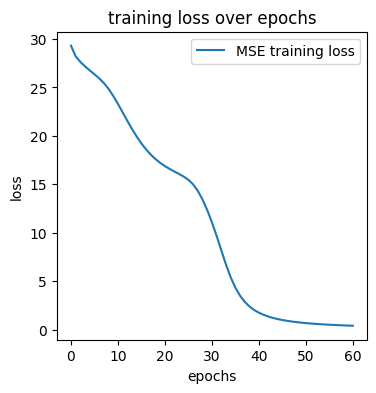

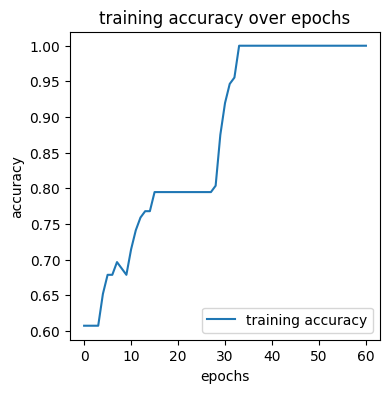

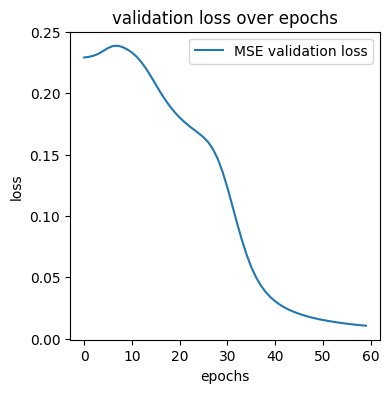

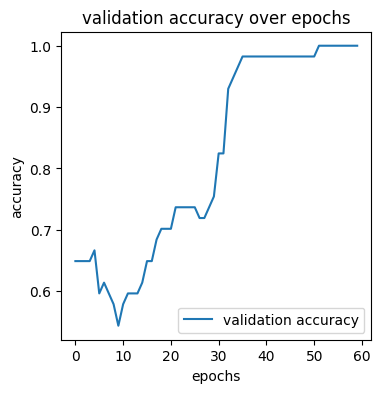

In [122]:
plot_over_epochs(y_values=nn_monk1.training_losses, title='training loss over epochs', y_label='loss', legend='MSE training loss')
plot_over_epochs(y_values=nn_monk1.training_evaluations, title='training accuracy over epochs', y_label='accuracy', legend='training accuracy')
plot_over_epochs(y_values=nn_monk1.validation_losses, title='validation loss over epochs', y_label='loss', legend='MSE validation loss')
plot_over_epochs(y_values=nn_monk1.validation_evaluations, title='validation accuracy over epochs', y_label='accuracy', legend='validation accuracy')

In [123]:
test_accuracy = nn_monk1.predict_and_evaluate(test_data, test_target, Metrics.ACCURACY.value)
test_mse = nn_monk1.predict_and_evaluate(test_data, test_target, Metrics.MSE.value)
test_mee = nn_monk1.predict_and_evaluate(test_data, test_target, Metrics.MEE.value)
print("TEST RESULTS:")
print(f"Accuracy: {test_accuracy} \nMSE: {test_mse} \nMEE: {test_mee}")

TEST RESULTS:
Accuracy: 1.0 
MSE: 0.009168948641953598 
MEE: 0.07433084939460961


### 1.2. Monks-2

In [111]:
train_data, train_target = read_monk('datasets/monks/monks-2.train')
test_data, test_target = read_monk('datasets/monks/monks-2.test')
train_data, train_target = shuffle(train_data, train_target)

split_index = len(train_data) * 2 // 3
train_data, val_data = train_data[:split_index], train_data[split_index:]
train_target, val_target = train_target[:split_index], train_target[split_index:]

In [118]:
nn_monk2 = NeuralNetwork(
    n_hidden_layers=1,
    hidden_layer_sizes=[3], 
    n_output_units=1, 
    training_loss_type_value=LossFunction.MSE.value, 
    validation_loss_type_value=LossFunction.MSE.value,
    evaluation_metric_type_value=Metrics.ACCURACY.value,
    activation_hidden_type_value=ActivationFunction.SIGMOID.value, 
    activation_output_type_value=ActivationFunction.SIGMOID.value, 
    learning_rate=0.2,
    reg_lambda=0,
    mom_alpha=0.9,
    epochs=1000, 
    batch_size=1, 
    classification=True, 
    early_stopping=True, 
    linear_decay=True,
    patience=20, 
    tollerance=0.00001,
    tao=300, 
    verbose=False
    ).train_net(train_data, train_target, test_data, test_target)

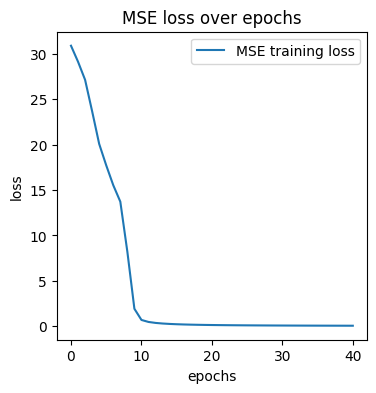

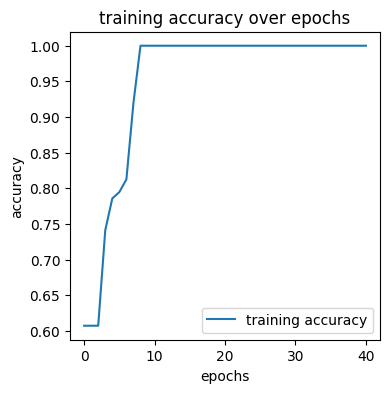

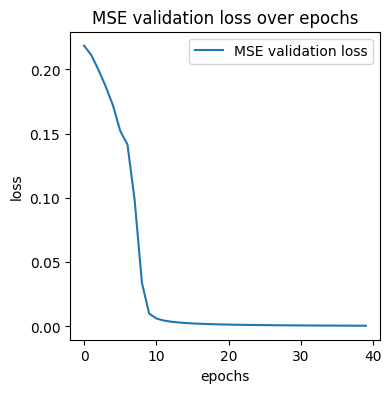

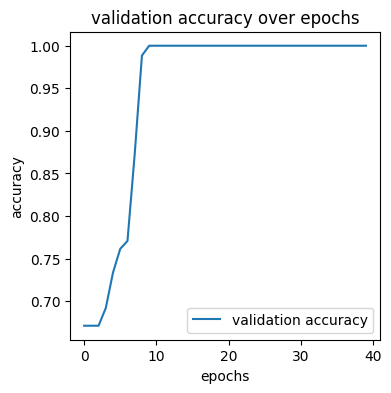

In [119]:
plot_over_epochs(y_values=nn_monk2.training_losses, title='MSE loss over epochs', y_label='loss', legend='MSE training loss')
plot_over_epochs(y_values=nn_monk2.training_evaluations, title='training accuracy over epochs', y_label='accuracy', legend='training accuracy')
plot_over_epochs(y_values=nn_monk2.validation_losses, title='MSE validation loss over epochs', y_label='loss', legend='MSE validation loss')
plot_over_epochs(y_values=nn_monk2.validation_evaluations, title='validation accuracy over epochs', y_label='accuracy', legend='validation accuracy')

In [120]:
test_accuracy = nn_monk2.predict_and_evaluate(test_data, test_target, Metrics.ACCURACY.value)
test_mse = nn_monk2.predict_and_evaluate(test_data, test_target, Metrics.MSE.value)
test_mee = nn_monk2.predict_and_evaluate(test_data, test_target, Metrics.MEE.value)
print("TEST RESULTS:")
print(f"Accuracy: {test_accuracy} \nMSE: {test_mse} \nMEE: {test_mee}")

TEST RESULTS:
Accuracy: 1.0 
MSE: 0.0005779392593714661 
MEE: 0.022143340287512078


### 1.3. Monks-3

In [124]:
train_data, train_target = read_monk('datasets/monks/monks-3.train')
test_data, test_target = read_monk('datasets/monks/monks-3.test')
train_data, train_target = shuffle(train_data, train_target)

split_index = len(train_data) * 2 // 3
train_data, val_data = train_data[:split_index], train_data[split_index:]
train_target, val_target = train_target[:split_index], train_target[split_index:]

In [125]:
nn_monk3 = NeuralNetwork(
    n_hidden_layers=1, 
    hidden_layer_sizes=[3], 
    n_output_units=1, 
    training_loss_type_value=LossFunction.MSE.value, 
    validation_loss_type_value=LossFunction.MSE.value, 
    evaluation_metric_type_value=Metrics.ACCURACY.value,
    activation_hidden_type_value=ActivationFunction.SIGMOID.value, 
    activation_output_type_value=ActivationFunction.SIGMOID.value, 
    learning_rate=0.02, 
    reg_lambda=0.0005,
    mom_alpha=0.9,
    epochs=1000, 
    batch_size=1, 
    classification=True, 
    early_stopping=True, 
    linear_decay=True,
    patience=10, 
    tollerance=0.001, 
    tao=300,
    verbose=False
    ).train_net(train_data, train_target, test_data, test_target)

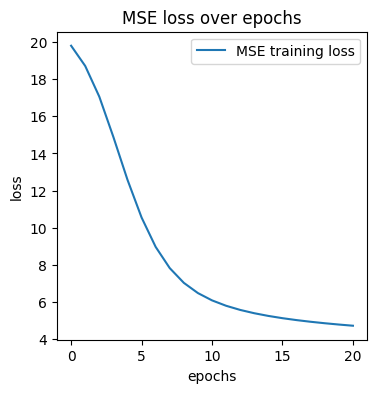

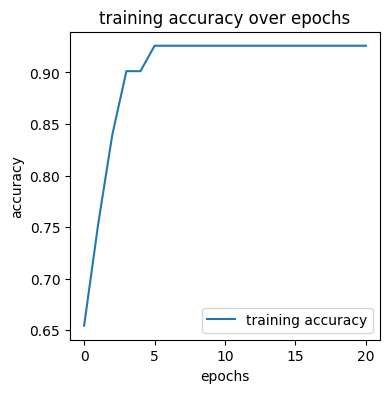

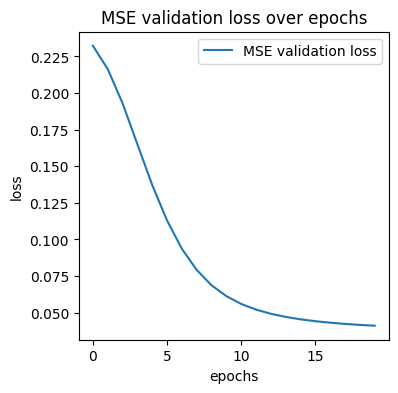

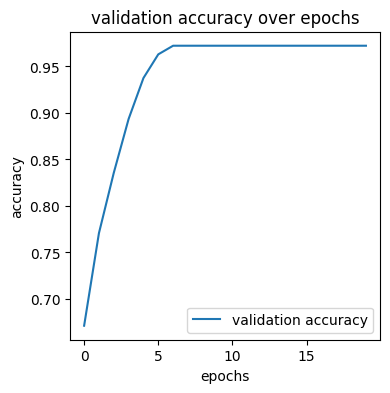

In [127]:
plot_over_epochs(y_values=nn_monk3.training_losses, title='MSE loss over epochs', y_label='loss', legend='MSE training loss')
plot_over_epochs(y_values=nn_monk3.training_evaluations, title='training accuracy over epochs', y_label='accuracy', legend='training accuracy')
plot_over_epochs(y_values=nn_monk3.validation_losses, title='MSE validation loss over epochs', y_label='loss', legend='MSE validation loss')
plot_over_epochs(y_values=nn_monk3.validation_evaluations, title='validation accuracy over epochs', y_label='accuracy', legend='validation accuracy')

In [128]:
test_accuracy = nn_monk3.predict_and_evaluate(test_data, test_target, Metrics.ACCURACY.value)
test_mse = nn_monk3.predict_and_evaluate(test_data, test_target, Metrics.MSE.value)
test_mee = nn_monk3.predict_and_evaluate(test_data, test_target, Metrics.MEE.value)
print("TEST RESULTS:")
print(f"Accuracy: {test_accuracy} \nMSE: {test_mse} \nMEE: {test_mee}")

TEST RESULTS:
Accuracy: 0.9699074074074074 
MSE: 0.04063519602502845 
MEE: 0.13981822044189052


### 1.4. Monks-3 Kfold-cv

In [ ]:
data, target = read_monk('datasets/monks/monks-3.train')

config = dict(
    n_hidden_layers=1, 
    hidden_layer_sizes=[3], 
    n_output_units=1, 
    training_loss_type_value=LossFunction.MSE.value, 
    validation_loss_type_value=LossFunction.MSE.value, 
    activation_hidden_type_value=ActivationFunction.SIGMOID.value, 
    activation_output_type_value=ActivationFunction.SIGMOID.value, 
    learning_rate=0.02, 
    reg_lambda=0.0005,
    mom_alpha=0.9,
    epochs=1000, 
    batch_size=1, 
    classification=True, 
    early_stopping=True, 
    linear_decay=True,
    patience=60, 
    tollerance=0.001, 
    tao=300,
    verbose=False
)

metrics = [Metrics.MSE.value, Metrics.MEE.value, Metrics.ACCURACY.value]
kfold_cv(10, data, target, metrics, cv_verbose=True, **config)

# 2. OLD ML_CUP

In [ ]:
data, targets = read_old_cup('datasets/cup/ML-CUP22-TR.csv')
train_data, test_data, train_target, test_target = splitter(data, targets, 0.8)
shuffle(train_data, train_target)
shuffle(test_data, test_data)

train_data, validation_data, train_target, validation_target = splitter(train_data, train_target, 0.66)
shuffle(train_data, train_target)
shuffle(validation_data, validation_target)

nn = NeuralNetwork(
    n_hidden_layers=2, 
    hidden_layer_sizes=[60, 30], 
    n_output_units=2, 
    training_loss_type_value=LossFunction.MSE.value, 
    validation_loss_type_value=LossFunction.MSE.value, 
    evaluation_metric_type_value=Metrics.MEE.value,
    activation_hidden_type_value=ActivationFunction.SIGMOID.value, 
    activation_output_type_value=ActivationFunction.IDENTITY.value, 
    learning_rate=0.005, 
    reg_lambda=0.00025,
    mom_alpha=0.6,
    epochs=500, 
    batch_size=1, 
    classification=False, 
    early_stopping=True, 
    linear_decay=True,
    patience=30, 
    tollerance=0.00001,
    tao=300, 
    verbose=False
).train_net(train_data, train_target, validation_data, validation_target)

In [ ]:
plot_over_epochs(y_values=nn.training_losses, title='MSE loss over epochs', y_label='mse', legend='MSE training loss')
plot_over_epochs(y_values=nn.validation_losses, title='MSE validation loss over epochs', y_label='mse', legend='MSE validation loss')
plot_over_epochs(y_values=nn.training_evaluations, title='training MEE eval over epochs', y_label='mee', legend='MEE training eval')
plot_over_epochs(y_values=nn.validation_evaluations, title='validation MEE eval over epochs', y_label='mee', legend='MEE validation eval')

In [ ]:
test_mee = nn.predict_and_evaluate(test_data, test_target, Metrics.MEE.value)
training_mee = nn.training_evaluations[-1]
print(f"Training MEE: {training_mee} \nTest MEE: {test_mee}")

In [84]:
data, targets = read_old_cup('datasets/cup/ML-CUP22-TR.csv')
train_data, test_data, train_target, test_target = splitter(data, targets, 0.8)

config = dict(
    n_hidden_layers=2, 
    hidden_layer_sizes=[60, 30], 
    n_output_units=2, 
    training_loss_type_value=LossFunction.MSE.value, 
    validation_loss_type_value=LossFunction.MSE.value, 
    evaluation_metric_type_value=Metrics.MEE.value,
    activation_hidden_type_value=ActivationFunction.SIGMOID.value, 
    activation_output_type_value=ActivationFunction.IDENTITY.value, 
    learning_rate=0.005, 
    reg_lambda=0.00025,
    mom_alpha=0.6,
    epochs=500, 
    batch_size=1, 
    classification=False, 
    early_stopping=True, 
    linear_decay=True,
    patience=30, 
    tollerance=0.00001,
    tao=300, 
    verbose=False
)

metrics_results = kfold_cv(5, train_data, train_target, [Metrics.MSE.value, Metrics.MEE.value], cv_verbose=True, **config)


Fold 1:
mse: 3.839292148080715
mee: 1.4560543060847224

Fold 2:
mse: 3.8645507179989367
mee: 1.4899685867536299

Fold 3:
mse: 3.9335363681444706
mee: 1.6057008628772953

Fold 4:
mse: 3.750145676365142
mee: 1.5495612925078561

Fold 5:
mse: 3.8571591471119113
mee: 1.5103040611865197


In [85]:
print(metrics_results)

{'mse': 3.8489368115402356, 'mee': 1.5223178218820046}


# 3. ML_CUP

In [132]:
data, targets = read_cup('datasets/cup/CUP_TR.csv')
train_data, test_data, train_target, test_target = splitter(data, targets, 0.8)

train_data, validation_data, train_target, validation_target = splitter(train_data, train_target, 0.66)
shuffle(train_data, train_target)
shuffle(validation_data, validation_target)

nn = NeuralNetwork(
    n_hidden_layers=2, 
    hidden_layer_sizes=[60, 30], 
    n_output_units=3, 
    training_loss_type_value=LossFunction.MSE.value, 
    validation_loss_type_value=LossFunction.MSE.value, 
    evaluation_metric_type_value=Metrics.MEE.value,
    activation_hidden_type_value=ActivationFunction.SIGMOID.value, 
    activation_output_type_value=ActivationFunction.IDENTITY.value, 
    learning_rate=0.005, 
    reg_lambda=0.00025,
    mom_alpha=0.6,
    epochs=500, 
    batch_size=1, 
    classification=False, 
    early_stopping=True, 
    linear_decay=True,
    patience=30, 
    tollerance=0.00001,
    tao=300, 
    verbose=False
).train_net(train_data, train_target, test_data, test_target)

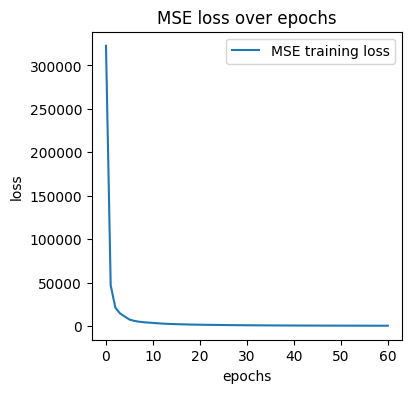

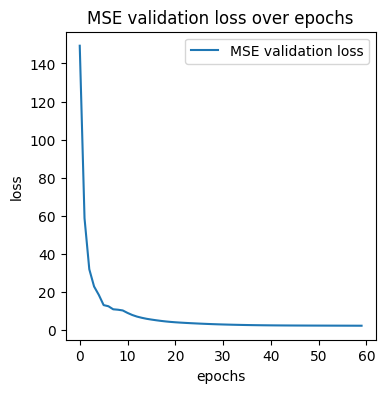

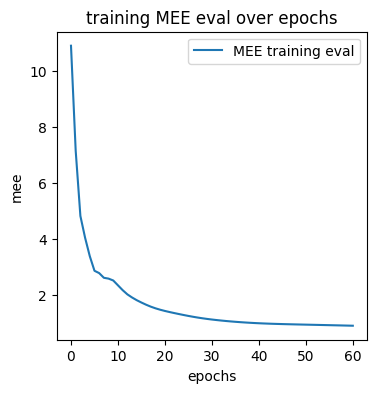

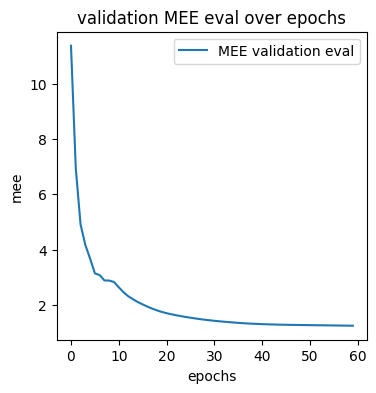

In [133]:
plot_over_epochs(y_values=nn.training_losses, title='MSE loss over epochs', y_label='loss', legend='MSE training loss')
plot_over_epochs(y_values=nn.validation_losses, title='MSE validation loss over epochs', y_label='loss', legend='MSE validation loss')
plot_over_epochs(y_values=nn.training_evaluations, title='training MEE eval over epochs', y_label='mee', legend='MEE training eval')
plot_over_epochs(y_values=nn.validation_evaluations, title='validation MEE eval over epochs', y_label='mee', legend='MEE validation eval')

In [134]:
test_mee = nn.predict_and_evaluate(test_data, test_target, Metrics.MEE.value)
training_mee = nn.training_evaluations[-1]
print(f"Training MEE: {training_mee} \nTest MEE: {test_mee}")

Training MEE: 0.8945815985852268 
Test MEE: 1.2501868102462113
